In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

G:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
train = pd.read_csv(r'G:\machine learning\kaggle\Digit Recognizer\train.csv')
test = pd.read_csv(r'G:\machine learning\kaggle\Digit Recognizer\test.csv')

In [12]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_train = train['label']
x_train = train.drop('label',axis=1)
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


G:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


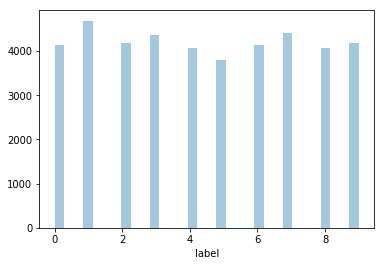

In [14]:
sns.distplot(y_train, kde=False)

In [15]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [16]:
all_data_na = x_train.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index)
all_data_na.head()

Series([], dtype: int64)

In [17]:
all_data_na = test.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index)
all_data_na.shape

(0,)

In [18]:
x_train = x_train/255
test = test/255

In [19]:
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [20]:
y_train1 = to_categorical(y_train, num_classes=10)
y_train1

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [21]:
y_train2 = pd.get_dummies(y_train)
y_train2.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train1, test_size=0.2, random_state=2)

In [24]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08,decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

In [27]:
epochs = 30
batch_size = 86

In [28]:
x_train.shape

(33600, 28, 28, 1)

In [29]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [30]:
datagen.fit(x_train)
x_train.shape

(33600, 28, 28, 1)

In [32]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),epochs=epochs, validation_data=(x_test,y_test),
                   verbose=2,steps_per_epoch = x_train.shape[0]//batch_size, callbacks=[learning_rate_reduction])

Epoch 1/30
 - 35s - loss: 0.4451 - acc: 0.8579 - val_loss: 0.0810 - val_acc: 0.9757
Epoch 2/30
 - 7s - loss: 0.1346 - acc: 0.9601 - val_loss: 0.0458 - val_acc: 0.9862
Epoch 3/30
 - 7s - loss: 0.1002 - acc: 0.9717 - val_loss: 0.0342 - val_acc: 0.9892
Epoch 4/30
 - 7s - loss: 0.0826 - acc: 0.9756 - val_loss: 0.0385 - val_acc: 0.9886
Epoch 5/30
 - 7s - loss: 0.0785 - acc: 0.9761 - val_loss: 0.0295 - val_acc: 0.9914
Epoch 6/30
 - 7s - loss: 0.0681 - acc: 0.9798 - val_loss: 0.0268 - val_acc: 0.9914
Epoch 7/30
 - 7s - loss: 0.0652 - acc: 0.9823 - val_loss: 0.0371 - val_acc: 0.9893
Epoch 8/30
 - 7s - loss: 0.0609 - acc: 0.9823 - val_loss: 0.0446 - val_acc: 0.9885

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 9/30
 - 7s - loss: 0.0483 - acc: 0.9862 - val_loss: 0.0209 - val_acc: 0.9940
Epoch 10/30
 - 7s - loss: 0.0450 - acc: 0.9866 - val_loss: 0.0207 - val_acc: 0.9945
Epoch 11/30
 - 7s - loss: 0.0464 - acc: 0.9875 - val_loss: 0.0210 - val_acc: 0.9944
Epo

In [34]:
results = model.predict(test)
results = np.argmax(results,axis=1)
results = pd.Series(results, name='Label')

In [35]:
results.shape

(28000,)

In [36]:
submission = pd.concat([pd.Series(range(1,28001),name='ImageID'),results],axis=1)
submission.to_csv('submission.csv',index=False)